In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

In [10]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv("complex_interaction_water_data.csv")

# Separate features and target
X = df.drop('Potability', axis=1)
y = df['Potability']

# Scale the features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

# Optional: Convert to DataFrame for readability
x_scaled_df = pd.DataFrame(x_scaled, columns=x.columns)

# Display the scaled features
print(x_scaled_df.head())


         pH       TDS  Chlorine        EC       TOC       THM   Sulfate  \
0  0.100092  0.186146 -0.374513 -1.101355 -0.332351  0.651050  0.377478   
1  0.890818 -2.039943  0.291498 -0.869761  0.007952 -0.681835 -0.003809   
2  0.462446  0.026726 -1.451412 -1.021422  0.025200 -0.293122  0.460553   
3  1.282620 -1.900862 -1.487804 -0.840047 -0.210783 -0.576939  0.324322   
4 -0.307845 -0.724452  0.694326 -1.001287 -1.041086 -0.515603 -1.520551   

   Turbidity  
0  -0.313381  
1   0.039691  
2  -0.226349  
3  -0.272647  
4  -0.413070  


In [12]:
from sklearn.ensemble import RandomForestClassifier

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
print("Accuracy: ", model.score(X_test, y_test) * 100)

Accuracy:  99.79166666666667


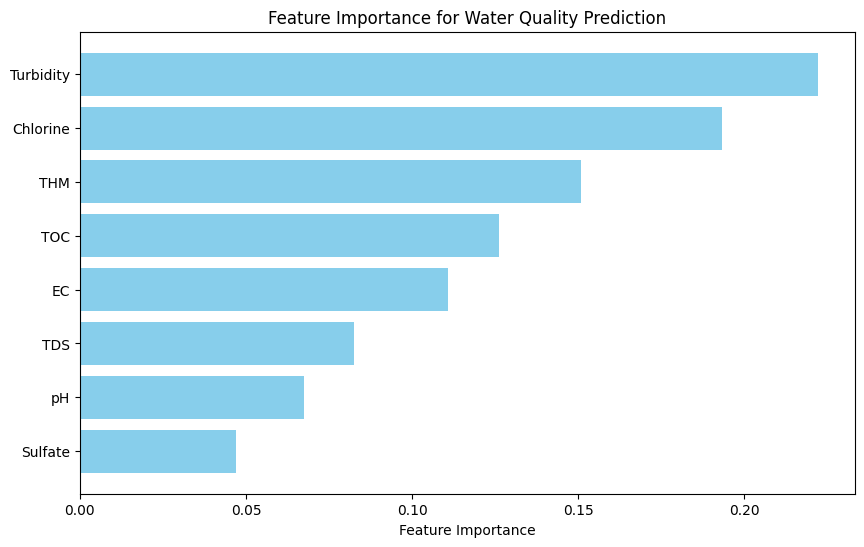

In [13]:
import matplotlib.pyplot as plt

# Get feature importances from the trained model
importances = model.feature_importances_

# Sort features by importance
sorted_idx = importances.argsort()

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(X.columns[sorted_idx], importances[sorted_idx], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance for Water Quality Prediction')
plt.show()


In [14]:
# Get feature importances from the trained model
importances = model.feature_importances_

# Normalize the importances to sum to 100%
importance_percentages = (importances / importances.sum()) * 100

# Sort features by importance
sorted_idx = importance_percentages.argsort()

# Print feature importance percentages in text format
print("Feature Importance for Water Quality Prediction:")
for i in sorted_idx:
    print(f"{X.columns[i]}: {importance_percentages[i]:.2f}%")


Feature Importance for Water Quality Prediction:
Sulfate: 4.70%
pH: 6.75%
TDS: 8.25%
EC: 11.08%
TOC: 12.61%
THM: 15.08%
Chlorine: 19.32%
Turbidity: 22.21%


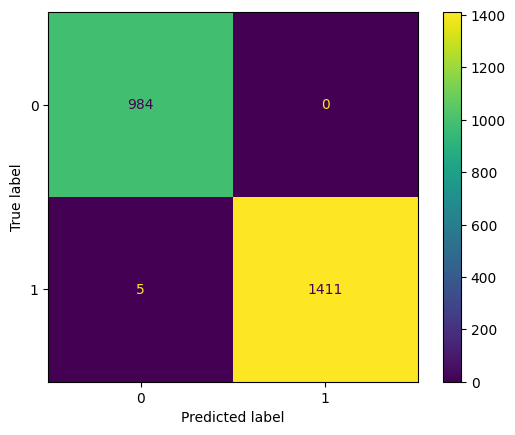

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


In [16]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.99      1.00      1.00       984
           1       1.00      1.00      1.00      1416

    accuracy                           1.00      2400
   macro avg       1.00      1.00      1.00      2400
weighted avg       1.00      1.00      1.00      2400



In [18]:
import joblib
joblib.dump(model, "water_quality_model.pkl")

['water_quality_model.pkl']

In [29]:
# --- Predict for a single custom input ---
sample = pd.DataFrame({
    'pH': [5.0],
    'TDS': [400],
    'Chlorine': [3.4],
    'EC': [350],
    'TOC': [1.0],
    'THM': [70],
    'Sulfate': [25],
    'Turbidity': [2]
})

# Ensure the column order matches the training set
sample = sample[X.columns]

# Predict and show result
prediction = model.predict(sample)[0]
print("Prediction:", "Potable ✅" if prediction == 1 else "Not Potable ❌")

Prediction: Not Potable ❌


In [24]:

# --- Predict for a single custom input ---
# Unsafe pH = 14
sample = pd.DataFrame({'pH': [14], 'TDS': [400], 'Chlorine': [2], 'EC': [350], 'TOC': [1], 'THM': [40], 'Sulfate': [20], 'Turbidity': [1]})



# Align column order
sample = sample[X.columns]

# Predict class and probability
prediction = model.predict(sample)[0]
probability = model.predict_proba(sample)[0]

# Output result
print(f"Prediction: {'Potable ✅' if prediction == 1 else 'Not Potable ❌'}")
print(f"Probability of being Potable: {probability[1]*100:.2f}%")
print(f"Probability of being Not Potable: {probability[0]*100:.2f}%")


Prediction: Not Potable ❌
Probability of being Potable: 25.00%
Probability of being Not Potable: 75.00%


In [25]:
import pandas as pd

def test_model_with_incrementing_params(model, base_input, step_sizes, steps=10):
    print("Testing model by incrementing each parameter...\n")
    for param in base_input:
        print(f"\nVarying '{param}' with others fixed:")
        for i in range(steps + 1):
            sample = base_input.copy()
            sample[param] += i * step_sizes[param]
            df_sample = pd.DataFrame([sample])
            prediction = model.predict(df_sample)[0]
            print(f"{param} = {sample[param]:.2f} --> Prediction: {'Potable' if prediction == 1 else 'Not Potable'}")

# Example base input with all safe values
base_input = {
    'pH': 7.0,
    'TDS': 400,
    'Chlorine': 2.5,
    'EC': 350,
    'TOC': 1.0,
    'THM': 50,
    'Sulfate': 150,
    'Turbidity': 2
}

# Step sizes for each parameter
step_sizes = {
    'pH': 0.5,
    'TDS': 100,
    'Chlorine': 0.5,
    'EC': 100,
    'TOC': 0.5,
    'THM': 10,
    'Sulfate': 50,
    'Turbidity': 1
}

# Call the function
test_model_with_incrementing_params(model, base_input, step_sizes, steps=10)


Testing model by incrementing each parameter...


Varying 'pH' with others fixed:
pH = 7.00 --> Prediction: Potable
pH = 7.50 --> Prediction: Potable
pH = 8.00 --> Prediction: Potable
pH = 8.50 --> Prediction: Potable
pH = 9.00 --> Prediction: Not Potable
pH = 9.50 --> Prediction: Not Potable
pH = 10.00 --> Prediction: Not Potable
pH = 10.50 --> Prediction: Not Potable
pH = 11.00 --> Prediction: Not Potable
pH = 11.50 --> Prediction: Not Potable
pH = 12.00 --> Prediction: Not Potable

Varying 'TDS' with others fixed:
TDS = 400.00 --> Prediction: Potable
TDS = 500.00 --> Prediction: Potable
TDS = 600.00 --> Prediction: Potable
TDS = 700.00 --> Prediction: Not Potable
TDS = 800.00 --> Prediction: Not Potable
TDS = 900.00 --> Prediction: Not Potable
TDS = 1000.00 --> Prediction: Not Potable
TDS = 1100.00 --> Prediction: Not Potable
TDS = 1200.00 --> Prediction: Not Potable
TDS = 1300.00 --> Prediction: Not Potable
TDS = 1400.00 --> Prediction: Not Potable

Varying 'Chlorine' with others f

In [29]:
import pandas as pd
from itertools import combinations

def test_model_with_param_pairs(model, base_input, step_sizes, steps=5):
    print("Testing model by varying pairs of parameters together...\n")
    
    params = list(base_input.keys())
    for param1, param2 in combinations(params, 2):
        print(f"\nVarying '{param1}' and '{param2}' together (others fixed):")
        print(f"{param1:>10} | {param2:>10} | Prediction")
        print("-" * 35)
        for i in range(steps + 1):
            sample = base_input.copy()
            sample[param1] += i * step_sizes[param1]
            sample[param2] += i * step_sizes[param2]
            df_sample = pd.DataFrame([sample])
            prediction = model.predict(df_sample)[0]
            print(f"{sample[param1]:10.2f} | {sample[param2]:10.2f} | {'Potable' if prediction == 1 else 'Not Potable'}")

# Base safe values
base_input = {
    'pH': 7.0,
    'TDS': 400,
    'Chlorine': 2.5,
    'EC': 350,
    'TOC': 1.0,
    'THM': 50,
    'Sulfate': 150,
    'Turbidity': 2
}

# Step sizes
step_sizes = {
    'pH': 0.5,
    'TDS': 100,
    'Chlorine': 0.5,
    'EC': 100,
    'TOC': 0.5,
    'THM': 10,
    'Sulfate': 50,
    'Turbidity': 1
}

# Call the function
test_model_with_param_pairs(model, base_input, step_sizes, steps=5)


Testing model by varying pairs of parameters together...


Varying 'pH' and 'TDS' together (others fixed):
        pH |        TDS | Prediction
-----------------------------------
      7.00 |     400.00 | Potable
      7.50 |     500.00 | Potable
      8.00 |     600.00 | Not Potable
      8.50 |     700.00 | Not Potable
      9.00 |     800.00 | Not Potable
      9.50 |     900.00 | Not Potable

Varying 'pH' and 'Chlorine' together (others fixed):
        pH |   Chlorine | Prediction
-----------------------------------
      7.00 |       2.50 | Potable
      7.50 |       3.00 | Potable
      8.00 |       3.50 | Potable
      8.50 |       4.00 | Potable
      9.00 |       4.50 | Not Potable
      9.50 |       5.00 | Not Potable

Varying 'pH' and 'EC' together (others fixed):
        pH |         EC | Prediction
-----------------------------------
      7.00 |     350.00 | Potable
      7.50 |     450.00 | Potable
      8.00 |     550.00 | Potable
      8.50 |     650.00 | Potable
    

In [45]:
import numpy as np
import pandas as pd
import joblib

# Load the trained model
model = joblib.load("water_quality_model.pkl")  # Change path if needed


Test Case 1: Predicted as Safe
Test Case 2: Predicted as Safe
Test Case 3: Predicted as Safe
Test Case 4: Predicted as Safe


In [52]:
features =  ['pH', 'TDS', 'Chlorine', 'EC', 'TOC', 'THM', 'Sulfate', 'Turbidity']
import pandas as pd

for i, test_case in enumerate(test_cases):
    input_df = pd.DataFrame([[test_case[feature] for feature in features]], columns=features)
    pred = model.predict(input_df)[0]
    print(f"Test Case {i+1}: Input: {test_case}")
    print(f"Predicted: {'Safe' if pred == 1 else 'Unsafe'}\n")


Test Case 1: Input: {'pH': 6.4, 'Turbidity': 0.5, 'Chlorine': 1.5, 'TDS': 300, 'Sulfate': 150, 'TOC': 2, 'EC': 400, 'THM': 60}
Predicted: Safe

Test Case 2: Input: {'pH': 7.0, 'Turbidity': 1.2, 'Chlorine': 3.0, 'TDS': 520, 'Sulfate': 180, 'TOC': 2.5, 'EC': 550, 'THM': 70}
Predicted: Safe

Test Case 3: Input: {'pH': 7.1, 'Turbidity': 0.7, 'Chlorine': 1.8, 'TDS': 410, 'Sulfate': 275, 'TOC': 1.5, 'EC': 500, 'THM': 55}
Predicted: Safe

Test Case 4: Input: {'pH': 8.0, 'Turbidity': 1.0, 'Chlorine': 2.5, 'TDS': 480, 'Sulfate': 200, 'TOC': 2.3, 'EC': 750, 'THM': 30}
Predicted: Safe



In [61]:
import numpy as np
import pandas as pd
import joblib

# Load the trained model
model = joblib.load("water_quality_model.pkl")

# Feature names (must match training order)
features = ['pH', 'TDS', 'Chlorine', 'EC', 'TOC', 'THM', 'Sulfate', 'Turbidity']

# Provide 3–4 previous readings (latest one last)
past_readings = np.array([
    [7.4, 400, 2.8, 300, 0.01, 35, 180, 0.4],
    [7.3, 420, 2.7, 350, 0.015, 37, 190, 0.5],
    [7.2, 450, 2.5, 500, 0.01, 40, 200, 0.5]  # Most recent
])

# Calculate rate of change per feature
# (difference between last and first readings) / number of intervals
num_steps = past_readings.shape[0] - 1
rate_of_change = (past_readings[-1] - past_readings[0]) / num_steps
current = past_readings[-1]

unsafe_detected = False

# Simulate next 5 time steps
for step in range(1, 6):
    future = current + step * rate_of_change
    future_df = pd.DataFrame([future], columns=features)
    prediction = model.predict(future_df)[0]

    print(f"Time Step {step}: Input = {future.round(2)}, Prediction = {'Safe' if prediction == 1 else 'Unsafe'}")

    if prediction == 0:
        unsafe_detected = True

# Final alert if any future value is unsafe
if unsafe_detected:
    print("⚠️ ALERT: Unsafe water quality predicted in future readings!")
else:
    print("✅ Water quality remains safe in all predicted steps.")


Time Step 1: Input = [7.10e+00 4.75e+02 2.35e+00 6.00e+02 1.00e-02 4.25e+01 2.10e+02 5.50e-01], Prediction = Safe
Time Step 2: Input = [7.0e+00 5.0e+02 2.2e+00 7.0e+02 1.0e-02 4.5e+01 2.2e+02 6.0e-01], Prediction = Safe
Time Step 3: Input = [6.90e+00 5.25e+02 2.05e+00 8.00e+02 1.00e-02 4.75e+01 2.30e+02 6.50e-01], Prediction = Unsafe
Time Step 4: Input = [6.8e+00 5.5e+02 1.9e+00 9.0e+02 1.0e-02 5.0e+01 2.4e+02 7.0e-01], Prediction = Unsafe
Time Step 5: Input = [6.70e+00 5.75e+02 1.75e+00 1.00e+03 1.00e-02 5.25e+01 2.50e+02 7.50e-01], Prediction = Unsafe
⚠️ ALERT: Unsafe water quality predicted in future readings!
